In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [4]:
data = pd.read_csv('/content/Google_train_data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [10]:
x_train = [] # Initialize x_train as a Python list
y_train = [] # Initialize y_train as a Python list

for i in range(60,1149):
  x_train.append(trainData[i-60:i,0]) # Append to the list
  y_train.append(trainData[i,0]) # Append to the list

x_train, y_train = np.array(x_train), np.array(y_train) # Convert lists to NumPy arrays after the loop

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1089, 60, 1)

In [14]:

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 12s - 354ms/step - loss: 0.0375
Epoch 2/20
35/35 - 5s - 157ms/step - loss: 0.0096
Epoch 3/20
35/35 - 12s - 332ms/step - loss: 0.0087
Epoch 4/20
35/35 - 5s - 153ms/step - loss: 0.0092
Epoch 5/20
35/35 - 10s - 291ms/step - loss: 0.0066
Epoch 6/20
35/35 - 10s - 293ms/step - loss: 0.0068
Epoch 7/20
35/35 - 6s - 170ms/step - loss: 0.0079
Epoch 8/20
35/35 - 6s - 175ms/step - loss: 0.0100
Epoch 9/20
35/35 - 5s - 154ms/step - loss: 0.0063
Epoch 10/20
35/35 - 7s - 196ms/step - loss: 0.0057
Epoch 11/20
35/35 - 10s - 289ms/step - loss: 0.0060
Epoch 12/20
35/35 - 9s - 253ms/step - loss: 0.0068
Epoch 13/20
35/35 - 10s - 292ms/step - loss: 0.0061
Epoch 14/20
35/35 - 10s - 293ms/step - loss: 0.0059
Epoch 15/20
35/35 - 11s - 326ms/step - loss: 0.0057
Epoch 16/20
35/35 - 5s - 153ms/step - loss: 0.0060
Epoch 17/20
35/35 - 10s - 292ms/step - loss: 0.0050
Epoch 18/20
35/35 - 7s - 195ms/step - loss: 0.0057
Epoch 19/20
35/35 - 9s - 249ms/step - loss: 0.0046
Epoch 20/20
35/35 - 7s - 193ms/

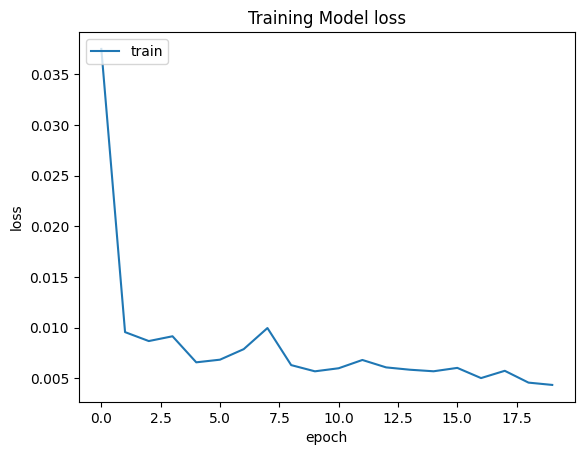

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
testData = pd.read_csv('/content/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
# The following line was indented but should not have been
x_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test) # this line was also indented in the original code
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(192, 60, 1)

In [21]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [22]:
predicted_price = sc.inverse_transform(y_pred)


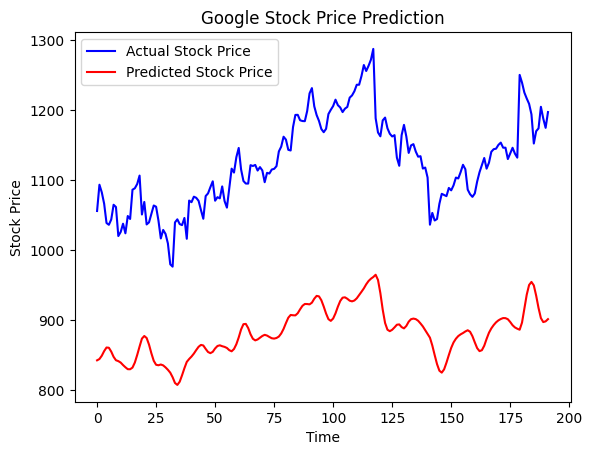

In [23]:
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predicted_price, color='red', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()